### OBTENÇÃO DE DADOS

In [2]:
#Importar os pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importar arquivo
df = pd.read_csv("listings.csv")

### Análise de Dados


## ANÁLISE DE DADOS

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimendo de como os dados estão estruturados

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,2022-06-21,0.29,3,351,0,NaN
1,5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,66,30,50,2019-12-02,0.29,2,151,0,NaN
2,6848,Rental unit in Brooklyn · ★4.58 · 2 bedrooms ·...,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81,30,191,2023-08-14,1.09,1,79,5,NaN
3,6872,Condo in New York · 1 bedroom · 1 bed · 1 shar...,16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65,30,1,2022-06-05,0.06,2,295,0,NaN
4,7064,Loft in Brooklyn · ★4.91 · 1 bedroom · 1 bed ·...,17297,Joelle,Brooklyn,Williamsburg,40.71248,-73.95881,Private room,95,30,13,2022-09-12,0.08,2,26,0,NaN


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

#### *Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais são os tipos das variáveis.

In [5]:
#Identificar o volume de dados do DataFrame
print(f"Entradas: \t {df.shape[0]}")
print(f"Variáveis: \t {df.shape[1]}")

Entradas: 	 38792
Variáveis: 	 18


São quase 39 mil linhas, e 18 variáveis

In [6]:
#Veriricar os tipos de variáveis
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

#### Q2. Qual a porcentagem de valores ausentes no *dataset*?

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores são significativos comparados ao total de entradas.

In [7]:
#Quantidade de valores null por linha
display(df.isnull().sum())

id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10352
reviews_per_month                 10352
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           35853
dtype: int64

In [8]:

por = (df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

por.round(2)


license                           92.42
reviews_per_month                 26.69
last_review                       26.69
host_name                          0.01
minimum_nights                     0.00
number_of_reviews_ltm              0.00
availability_365                   0.00
calculated_host_listings_count     0.00
number_of_reviews                  0.00
id                                 0.00
name                               0.00
room_type                          0.00
longitude                          0.00
latitude                           0.00
neighbourhood                      0.00
neighbourhood_group                0.00
host_id                            0.00
price                              0.00
dtype: float64

É possível observar que a variável `license` tem uma taxa altíssima de valores nulos. Enquanto `reviews_per_month` e `last_review` também possuem cerca de 1/4 dos valores nulos.

### Q3. Qual a o tipo de distribuição das variáveis?

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >]],
      dtype=object)

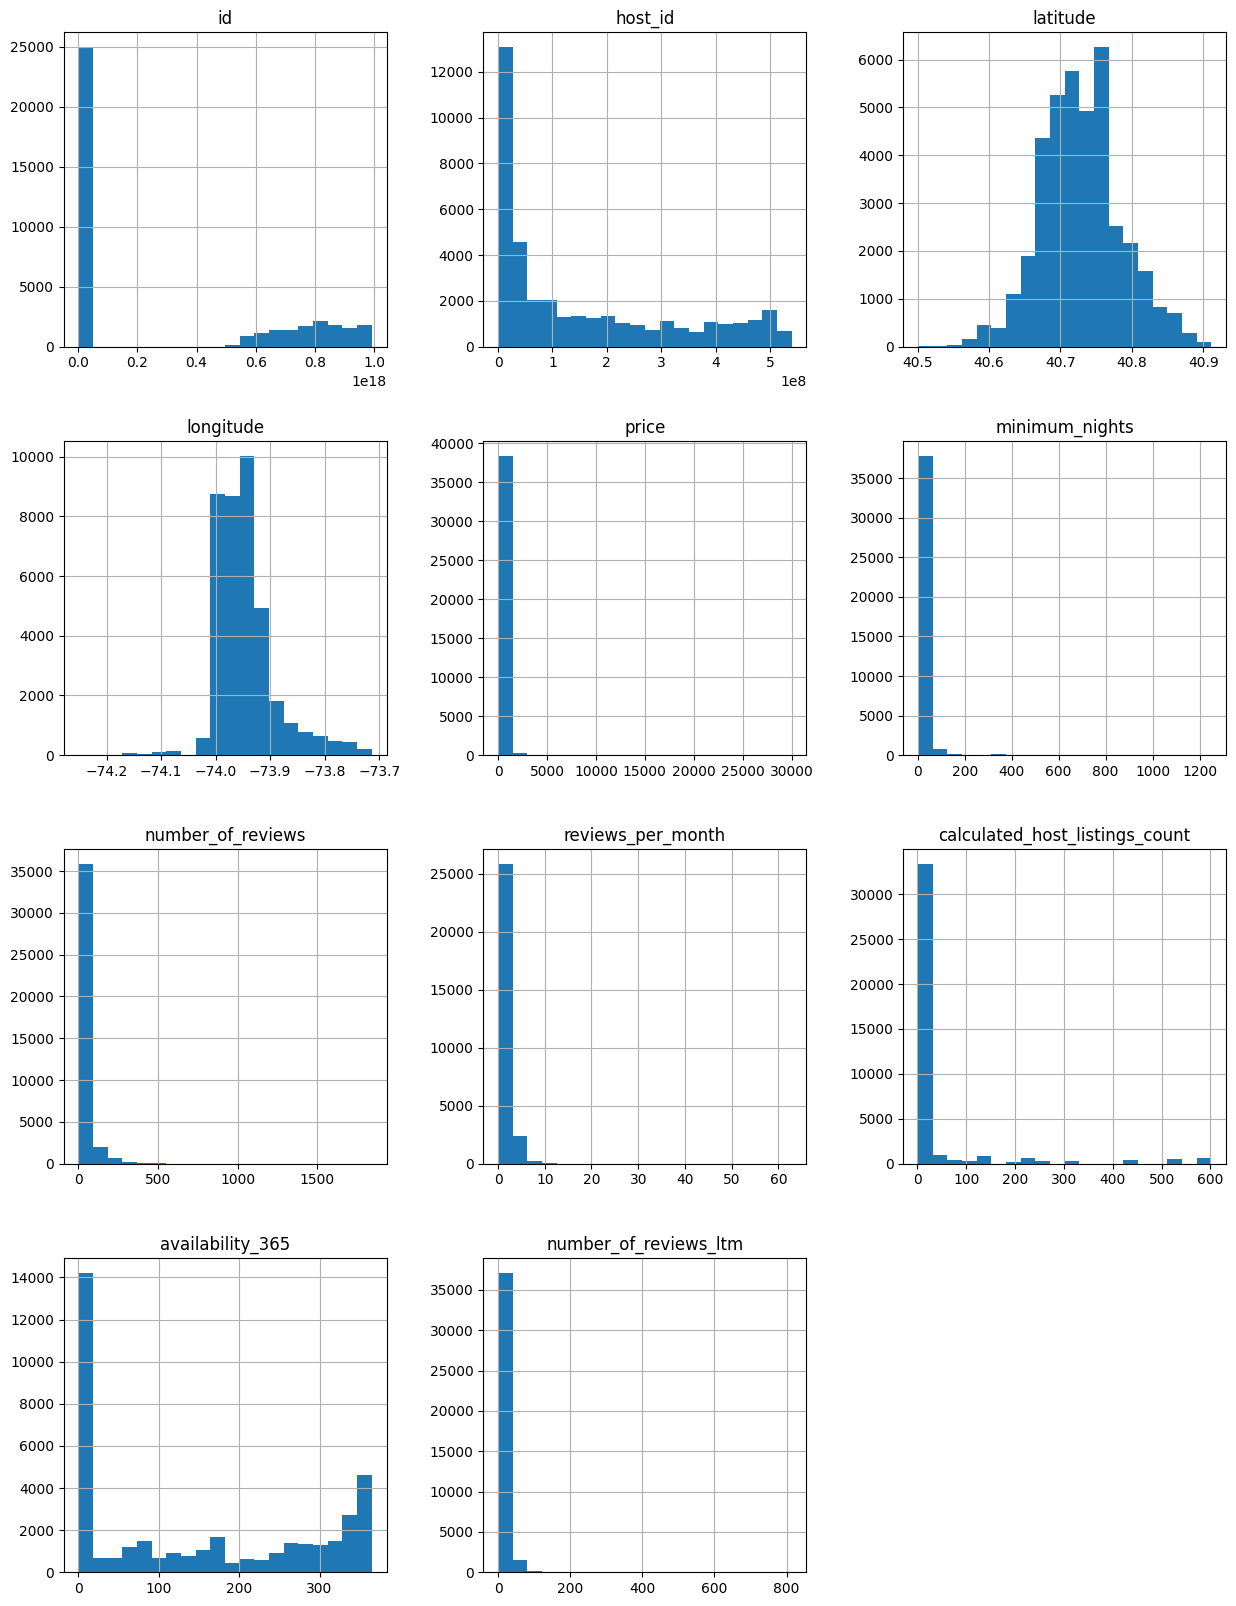

In [9]:
#Plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(15,20))

Percebe-se que alguns valores como, `price`, `minimum_nighits`, `reviews_per_month` e ademais,praticamente não seguem uma distribuição.  Isso pode distorcer a análise gráfica. Também podendo ser indícios de outliers.

### Q4. Há outilers presentes?
Há duas maneiras rápidas que auxiliam a detecção de outilers. São elas
* Resumo estático por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [10]:
#Ver o resumo estatístico das variáveis numéricas
df[
    ['price','minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']
].describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,38792.00,38792.00,38792.00,28440.00,38792.00,38792.00,38792.00
mean,215.95,30.64,25.36,1.08,38.58,148.75,6.95
std,496.01,26.63,55.85,1.65,113.31,142.26,16.63
min,0.00,1.00,0.00,0.01,1.00,0.00,0.00
25%,79.00,30.00,0.00,0.11,1.00,0.00,0.00
50%,135.00,30.00,4.00,0.41,1.00,120.00,0.00
75%,225.00,30.00,24.00,1.52,6.00,300.00,5.00
max,30000.00,1250.00,1843.00,62.82,602.00,365.00,814.00


Olhando o resumo acima, é possível confirmar algumas hipóteses como: 
* A variável `price` possui 75% do valor abaixo de 225, porém o valor máximo é 30000. Está discrepâncias se repete para outras variáveis, indicando a possível presença de outilers.

##### Boxplot para `price` e `minimum_nights`

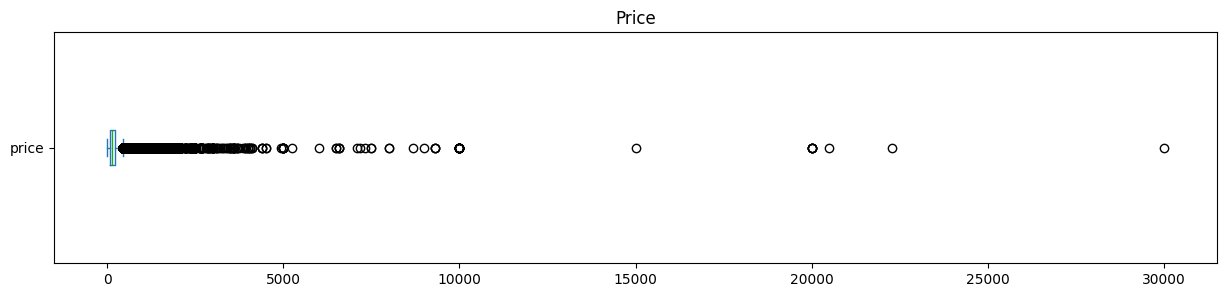

price: valores acima de 30
357
0.92%


In [11]:
#price
df['price'].plot(kind='box', vert=False, figsize=(15,3), title='Price')
plt.show()

#ver a quantidade de valores acima de 1500 para price
print("price: valores acima de 30")
print(f"{len(df[df['price'] > 1500])}")
print("{:.2f}%".format((len(df[df['price'] > 1500]) / df.shape[0]) * 100)) 

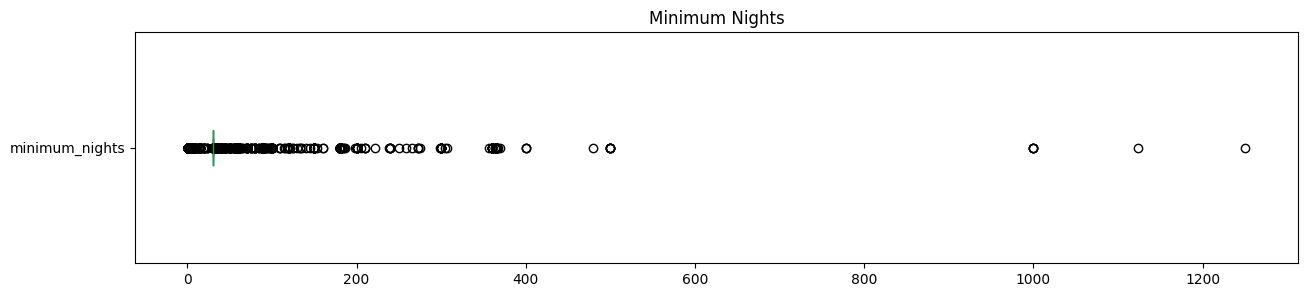

minimum_nights: valores acima de 30
937 entradas
2.42%


In [12]:
#Minimum nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3), title='Minimum Nights')
plt.show()

#Ver quantidade de valores acima de 30 dias
print("minimum_nights: valores acima de 30")
print("{} entradas".format(len(df[df.minimum_nights > 80])))
print("{:.2f}%".format((len(df[df.minimum_nights > 80]) / df.shape[0]) * 100)) 

#### Histogramas sem outilers
Já que identificamos outilers nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >]],
      dtype=object)

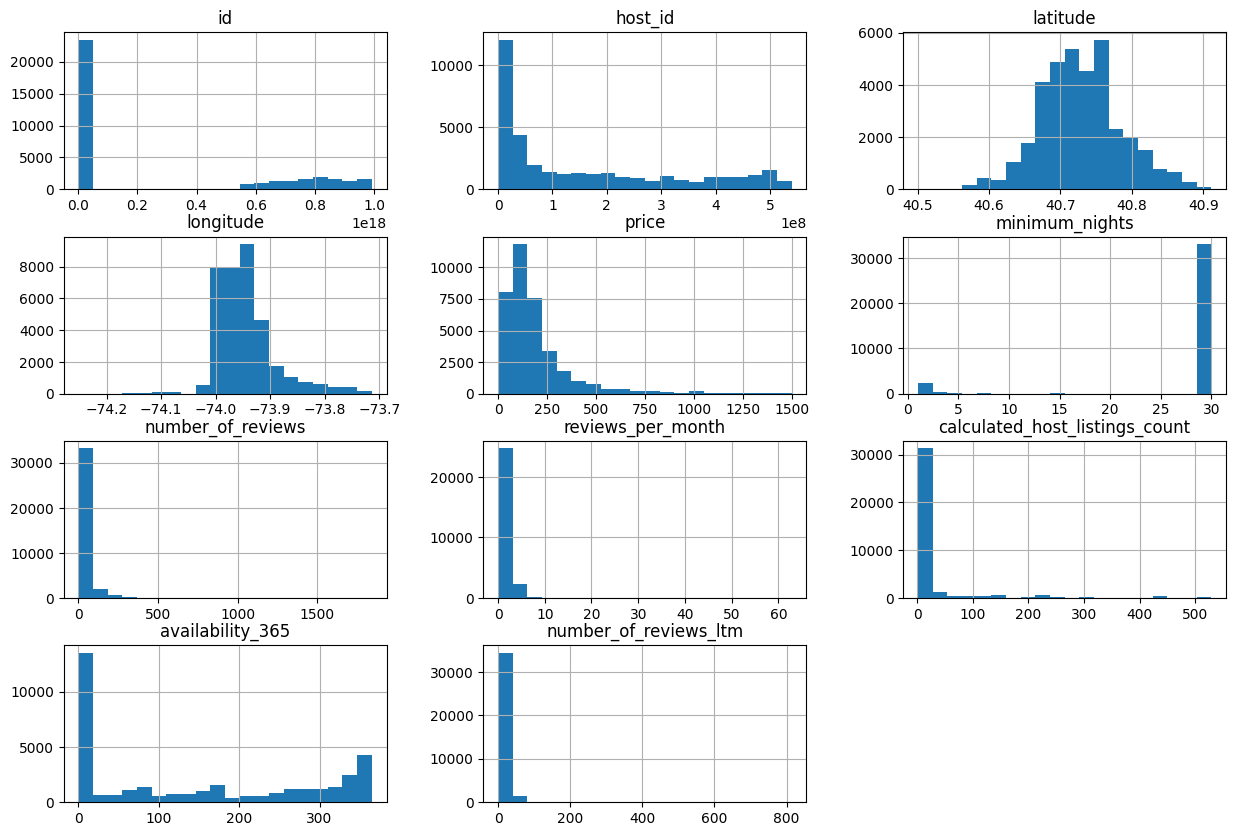

In [ ]:
#Remover os outilers em um novo Dataframse

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace = True)

#plotar o histograma para as variáveis numéricas
df_clean.hist(figsize=(15,10), bins = 20)

### **Q4. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficientes de correlação estabelecer qual a intensidade dela. Para identificar existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
#Criar uma matriz de correlação
corr = df_clean[['price','minimum_nights','number_of_reviews',
                 'reviews_per_month','calculated_host_listings_count','availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.335630,-0.012709,0.076638,0.009365,0.147089
minimum_nights,-0.335630,1.000000,-0.062188,-0.206856,-0.145013,-0.079404
number_of_reviews,-0.012709,-0.062188,1.000000,0.608917,-0.124464,0.121699
reviews_per_month,0.076638,-0.206856,0.608917,1.000000,-0.091599,0.249947
calculated_host_listings_count,0.009365,-0.145013,-0.124464,-0.091599,1.000000,0.050370
availability_365,0.147089,-0.079404,0.121699,0.249947,0.050370,1.000000


<Axes: >

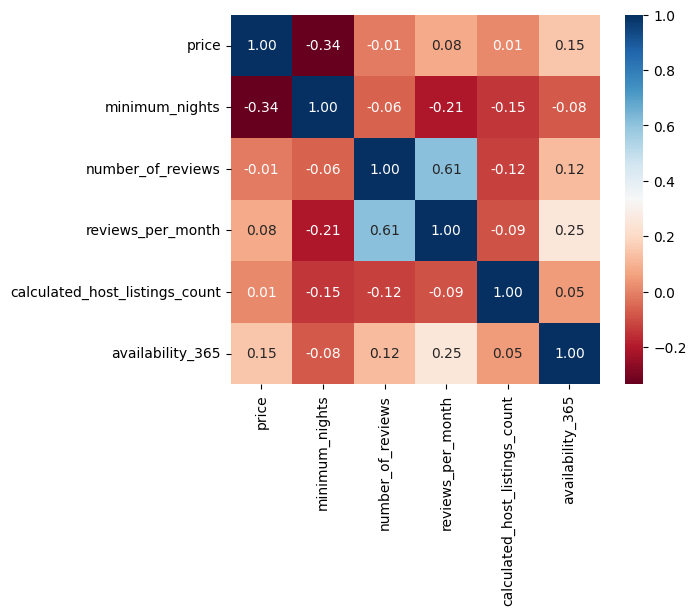

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/ casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos conta a ocorrências de cada tipo de aluguel usando o método `value_counts()`


In [ ]:
#Mostrar a quantidade de cada tipo de imível disponível
df_clean.room_type.value_counts()

room_type
Entire home/apt    19689
Private room       15875
Shared room          469
Hotel room           127
Name: count, dtype: int64

In [ ]:
#Mostrar a porcentagem de cada tipo de imível disponível
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

room_type
Entire home/apt    54.449668
Private room       43.902102
Shared room         1.297013
Hotel room          0.351217
Name: count, dtype: float64

### Q6.Qual a nacionalidade mais cara de NY? 
Uma maneira de verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comprar os bairros(neighbourhood) a partir do preço de locação.

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Fort Wadsworth       800.000000
Tribeca              444.767296
SoHo                 429.141818
Theater District     406.396501
Midtown              341.352136
NoHo                 324.866667
DUMBO                307.958333
Murray Hill          305.035422
Battery Park City    304.318182
Flatiron District    301.050633
Name: price, dtype: float64

In [ ]:
#Ver a quantidade de imóveis  em FortWadsworth
print(df_clean[df_clean.neighbourhood == 'Fort Wadsworth'].shape)

#Ver as entradas
df_clean[df_clean.neighbourhood == 'Fort Wadsworth']


(1, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
9964,20305160,Home in Staten Island · 5 bedrooms · 5 beds · ...,1715301,Mark,Staten Island,Fort Wadsworth,40.59324,-74.0608,Entire home/apt,800,30,0,NaN,NaN,3,365,0,NaN


<Axes: xlabel='longitude', ylabel='latitude'>

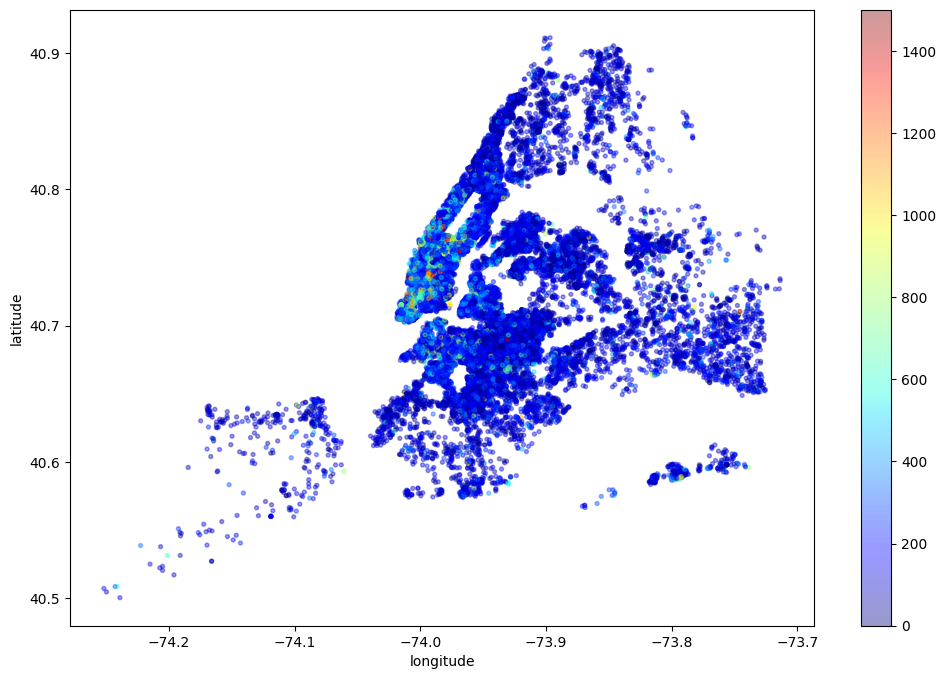

In [ ]:
df_clean.plot(kind="scatter", x="longitude",y="latitude",alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8))